## Data Set Problems 

 The company seeks **to automate (in real time) the loan qualifying procedure** based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in **accelerating decision-making process** for determining whether an applicant is eligible for a loan or not.

---

## Data Set Description 🧾
 There are **13 variables** in this data set:
*   **8 categorical** variables,
*   **4 continuous** variables, and
*   **1** variable to accommodate the loan ID.

<br>

 The following is the **structure of the data set**.


<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Loan_ID</b></td>
<td>Loan reference number <br> (unique ID)</td>
<td>LP001002; LP001003; ...</td>
</tr>
<tr>
<td><b>Gender</b></td>
<td>Applicant gender <br> (Male or Female)</td>
<td>Male; Female</td>
</tr>
<tr>
<td><b>Married</b></td>
<td>Applicant marital status <br> (Married or not married)</td>
<td>Married; Not Married</td>
</tr>
<tr>
<td><b>Dependents</b></td>
<td>Number of family members</td>
<td>0; 1; 2; 3+</td>
</tr>
<tr>
<td><b>Education</b></td>
<td>Applicant education/qualification <br> (graduate or not graduate)</td>
<td>Graduate; Under Graduate</td>
</tr>
<tr>
<td><b>Self_Employed</b></td>
<td>Applicant employment status <br> (yes for self-employed, no for employed/others)</td>
<td>Yes; No</td>
</tr>
<tr>
<td><b>ApplicantIncome</b></td>
<td>Applicant's monthly salary/income</td>
<td>5849; 4583; ...</td>
</tr>
<tr>
<td><b>CoapplicantIncome</b></td>
<td>Additional applicant's monthly salary/income</td>
<td>1508; 2358; ...</td>
</tr>
<tr>
<td><b>LoanAmount</b></td>
<td>Loan amount</td>
<td>128; 66; ...</td>
</tr>
<tr>
<td><b>Loan_Amount_Term</b></td>
<td>The loan's repayment period (in days)</td>
<td>360; 120; ...</td>
</tr>
<tr>
<td><b>Credit_History</b></td>
<td>Records of previous credit history <br> (0: bad credit history, 1: good credit history)</td>
<td>0; 1</td>
</tr>
<tr>
<td><b>Property_Area</b></td>
<td>The location of property <br> (Rural/Semiurban/Urban)</td>
<td>Rural; Semiurban; Urban</td>
</tr>
<tr>
<td><b>Loan_Status</b></td>
<td>Status of loan <br> (Y: accepted, N: not accepted)</td>
<td>Y; N</td>
</tr>
</tbody>
</table>
---

# import the libraries

In [161]:
#Main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import pickle
sns.set(rc={'figure.figsize': [15, 9]}, font_scale=1.3)

#Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

#Algorithms
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
#Tuning
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Data Exploration

## import the data

In [162]:
df = pd.read_csv('train_ctrUa4K.csv')

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


drop loan_id columnm

In [164]:
df.drop('Loan_ID',axis=1,inplace=True)

checking nulls and duplicate

In [165]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [166]:
df.duplicated().sum()

0

## Gender

In [167]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [168]:
df['Gender'].value_counts(dropna=False,normalize=True)*100

Male      79.641694
Female    18.241042
NaN        2.117264
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

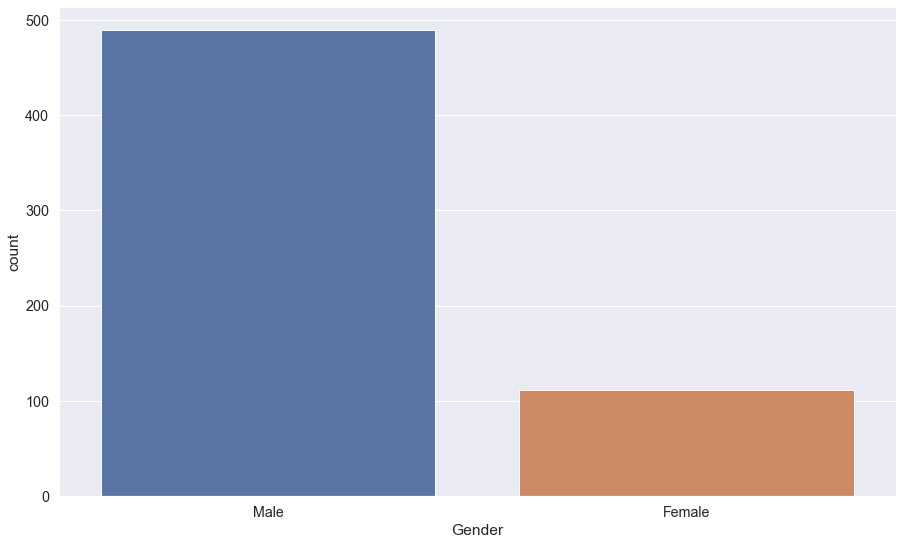

In [169]:
sns.countplot(data=df,x='Gender')

## Married

In [170]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [171]:
df['Married'].value_counts(dropna=False,normalize=True)*100

Yes    64.820847
No     34.690554
NaN     0.488599
Name: Married, dtype: float64

<AxesSubplot:xlabel='Married', ylabel='count'>

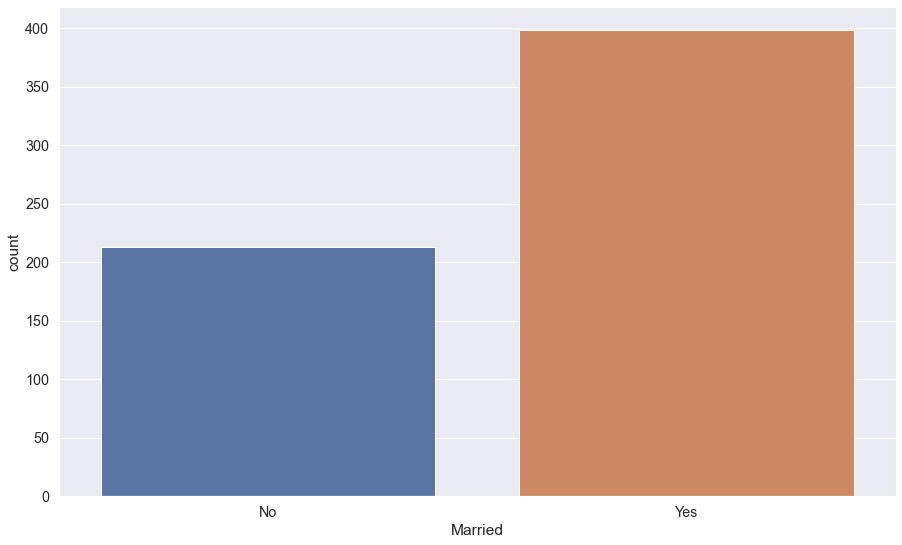

In [172]:
sns.countplot(data=df,x='Married')

## Dependents

In [173]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [174]:
df['Dependents'].value_counts(dropna=False,normalize=True)*100

0      56.188925
1      16.612378
2      16.449511
3+      8.306189
NaN     2.442997
Name: Dependents, dtype: float64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

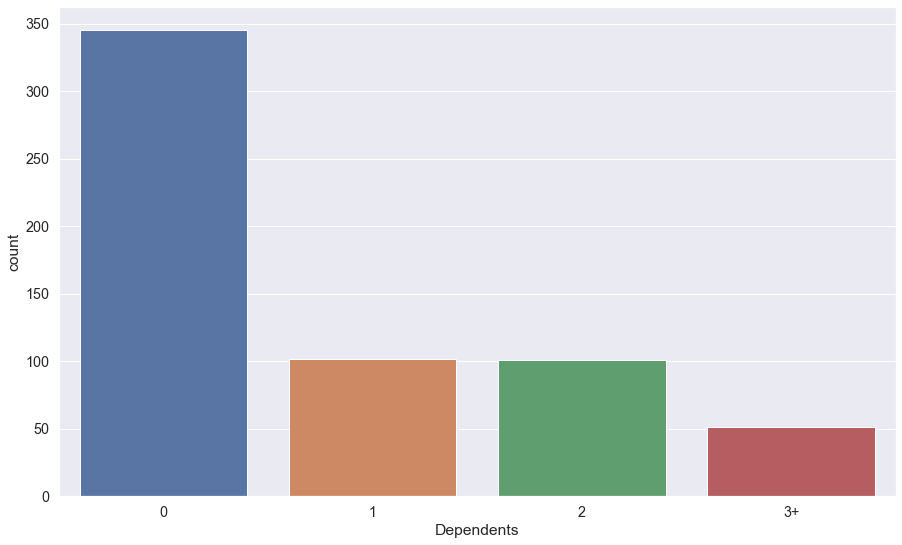

In [175]:
sns.countplot(data=df,x='Dependents')

## Education

In [176]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [177]:
df['Education'].value_counts(dropna=False,normalize=True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

<AxesSubplot:xlabel='Education', ylabel='count'>

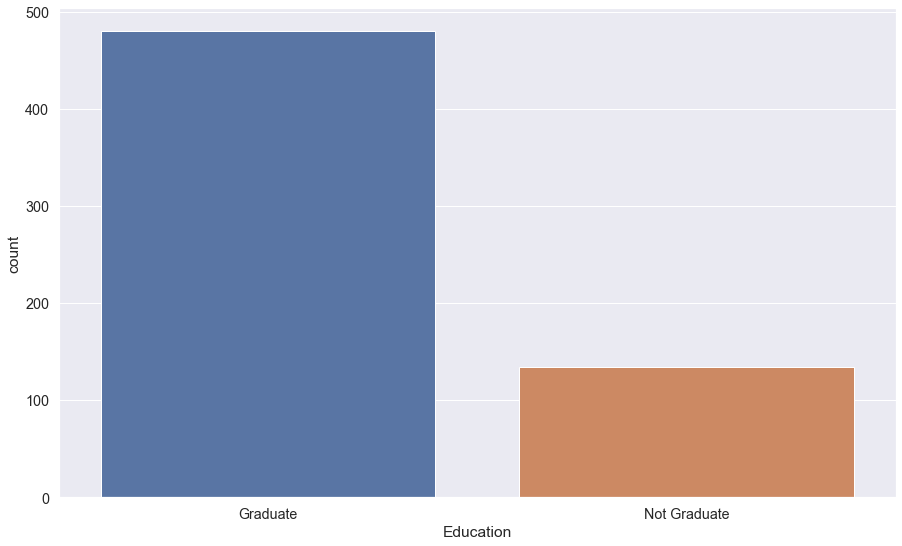

In [178]:
sns.countplot(data=df,x='Education')

## Credit_History

In [179]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [180]:
df['Credit_History'].value_counts(dropna=False,normalize=True)*100

1.0    77.361564
0.0    14.495114
NaN     8.143322
Name: Credit_History, dtype: float64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

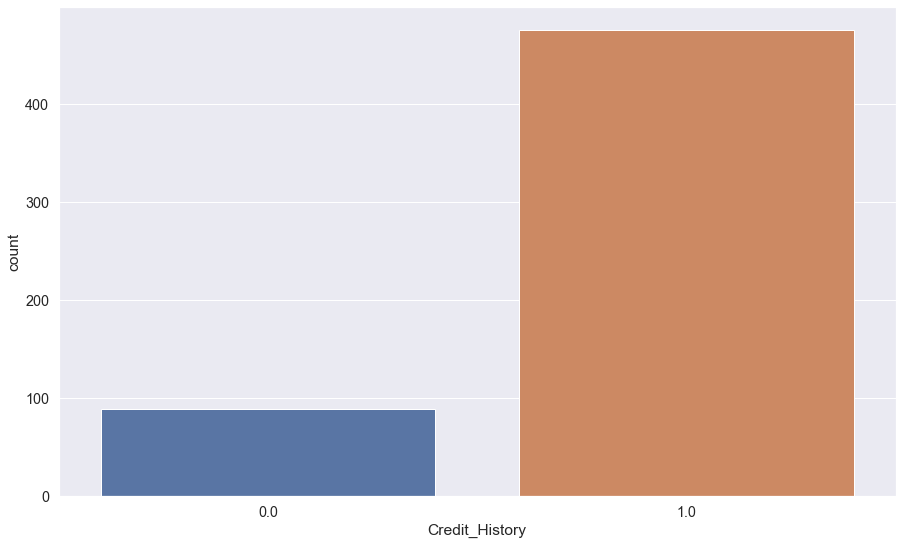

In [181]:
sns.countplot(data=df,x='Credit_History')

## Self_Employed

In [182]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [183]:
df['Self_Employed'].value_counts(dropna=False,normalize=True)*100

No     81.433225
Yes    13.355049
NaN     5.211726
Name: Self_Employed, dtype: float64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

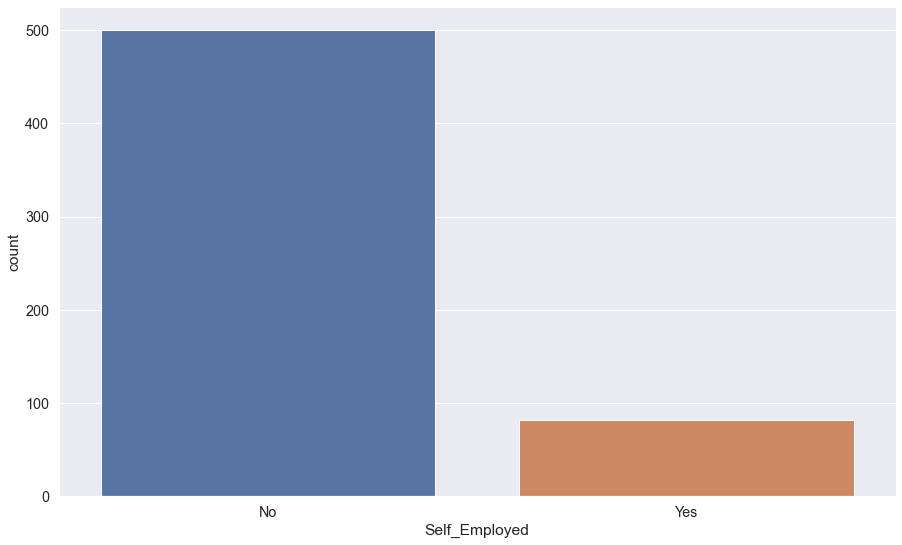

In [184]:
sns.countplot(data=df,x='Self_Employed')

## Property_Area

In [185]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [186]:
df['Property_Area'].value_counts(dropna=False,normalize=True)*100

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

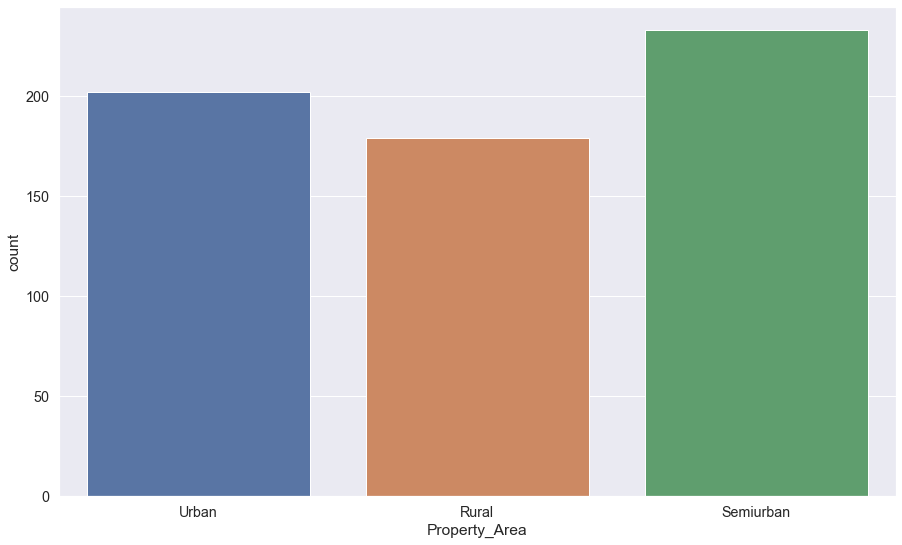

In [187]:
sns.countplot(data=df,x='Property_Area')

## Loan_Status

In [188]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [189]:
df['Loan_Status'].value_counts(dropna=False,normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

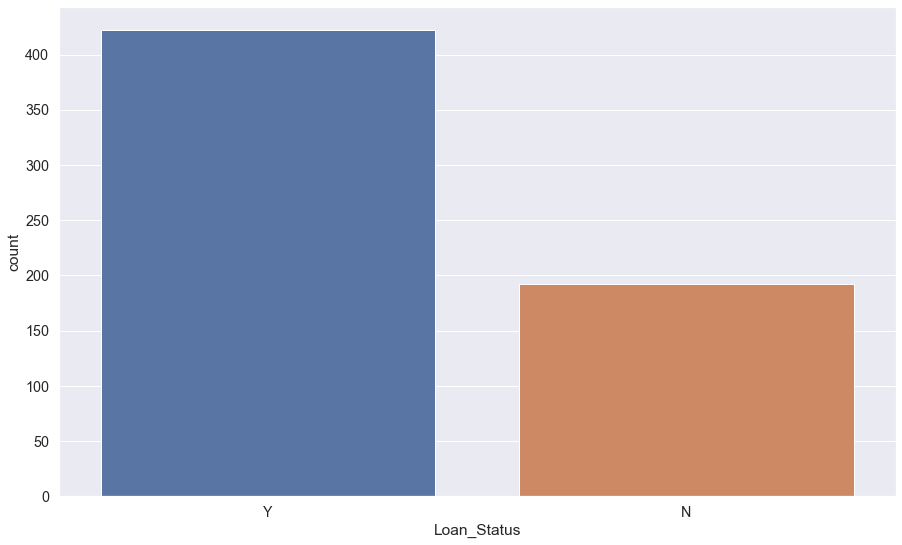

In [190]:
sns.countplot(data=df,x='Loan_Status')

## Loan_Amount_Term

In [191]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

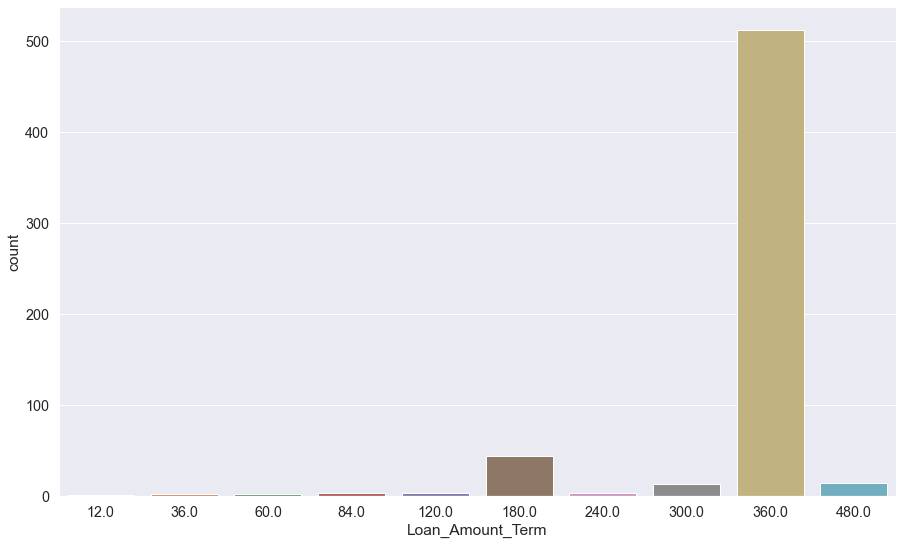

In [192]:
sns.countplot(data=df,x='Loan_Amount_Term')

In [193]:
df['Loan_Amount_Term'].value_counts(dropna=False,normalize=True)*100

360.0    83.387622
180.0     7.166124
480.0     2.442997
NaN       2.280130
300.0     2.117264
240.0     0.651466
84.0      0.651466
120.0     0.488599
60.0      0.325733
36.0      0.325733
12.0      0.162866
Name: Loan_Amount_Term, dtype: float64

## Describe Numerical Variable

In [194]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


## ApplicantIncome

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

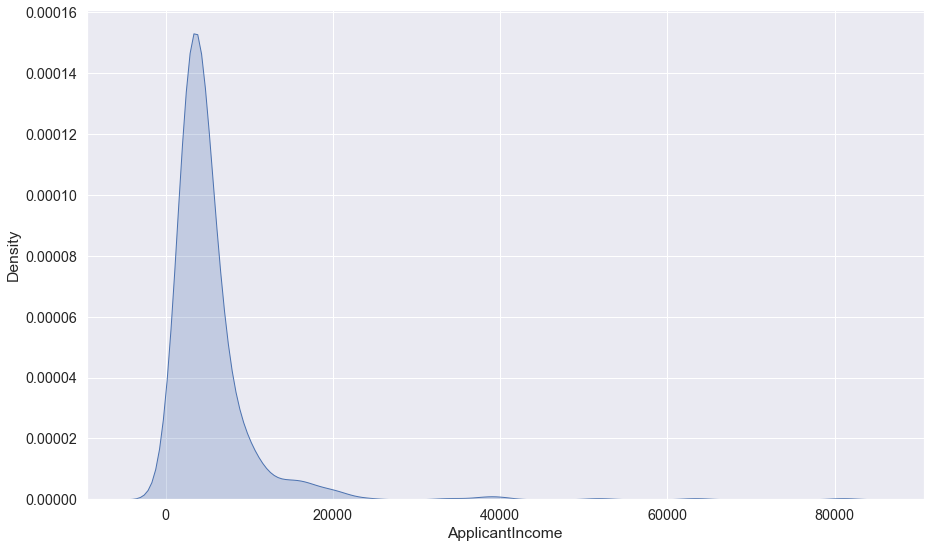

In [195]:
sns.kdeplot(data=df,x='ApplicantIncome',shade=True)

<AxesSubplot:xlabel='ApplicantIncome'>

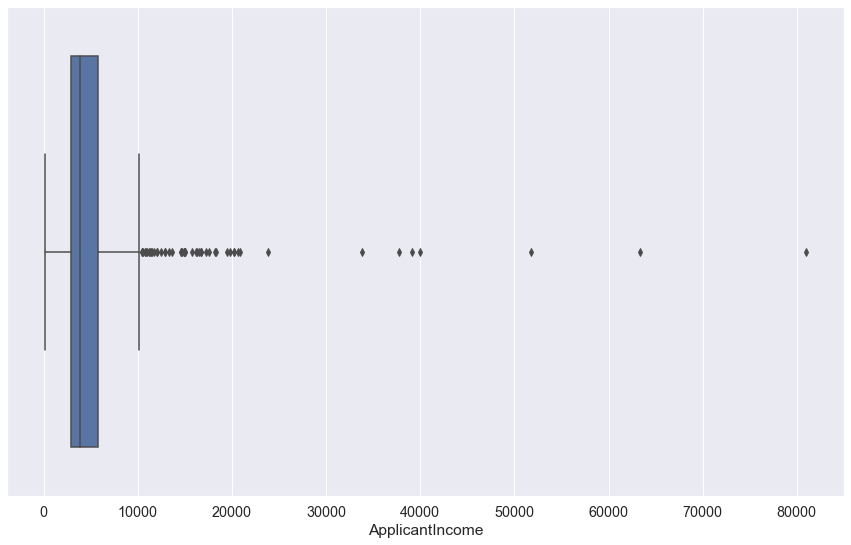

In [196]:
sns.boxplot(data = df , x ="ApplicantIncome")

In [197]:
df[(df['ApplicantIncome']>=30000)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
183,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
333,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
409,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
443,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y


## CoapplicantIncome

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

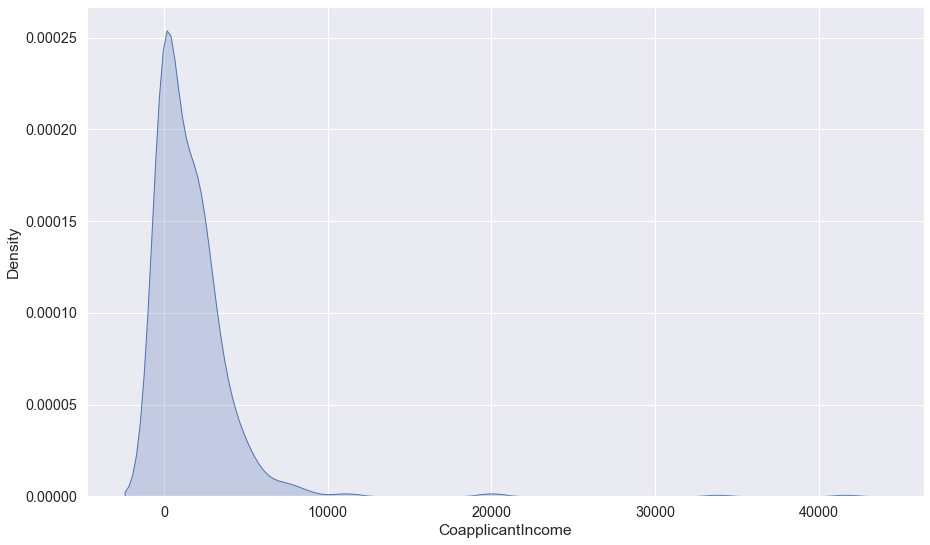

In [198]:
sns.kdeplot(data=df,x='CoapplicantIncome',shade=True)

<AxesSubplot:xlabel='CoapplicantIncome'>

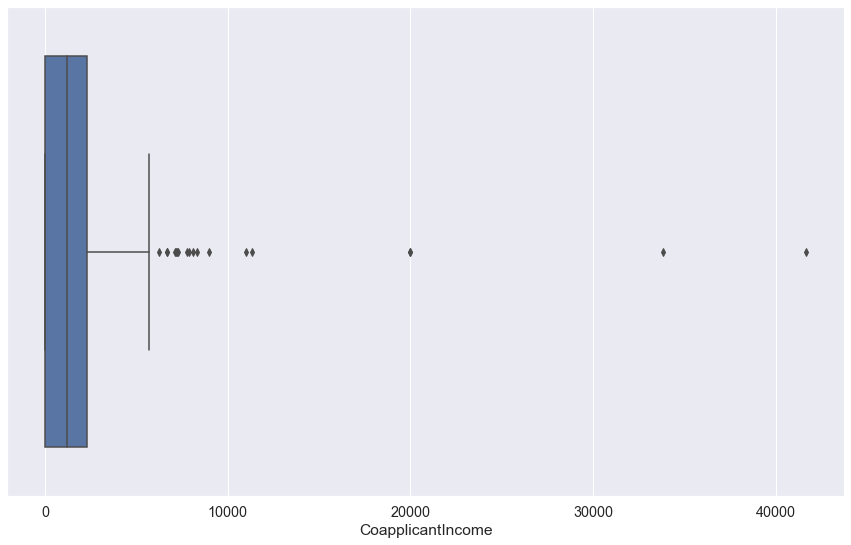

In [199]:
sns.boxplot(data = df , x ="CoapplicantIncome")

In [200]:
df[(df['CoapplicantIncome']>=15000)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
402,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y
417,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N
581,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
600,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N


In [201]:
df=df.drop(df[(df['CoapplicantIncome']>=15000)].index)

## LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

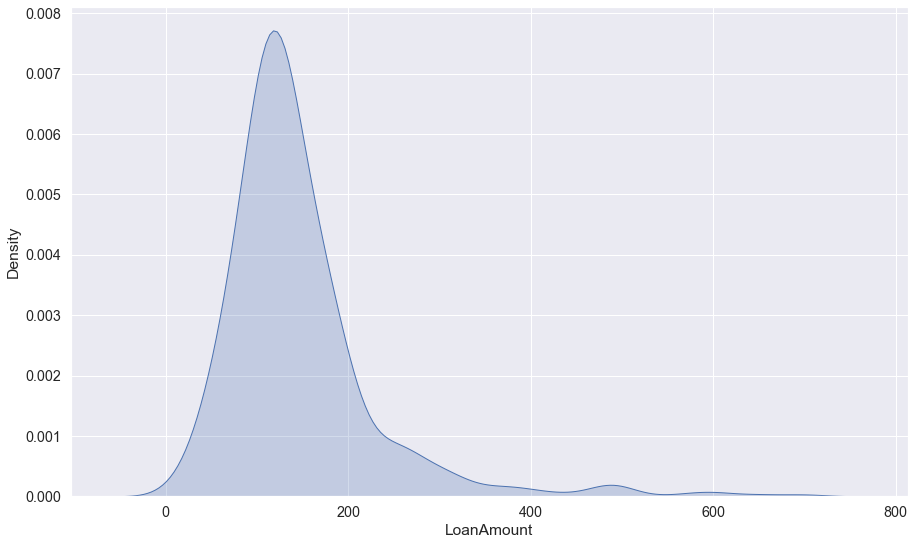

In [202]:
sns.kdeplot(data=df,x='LoanAmount',shade=True)

<AxesSubplot:xlabel='LoanAmount'>

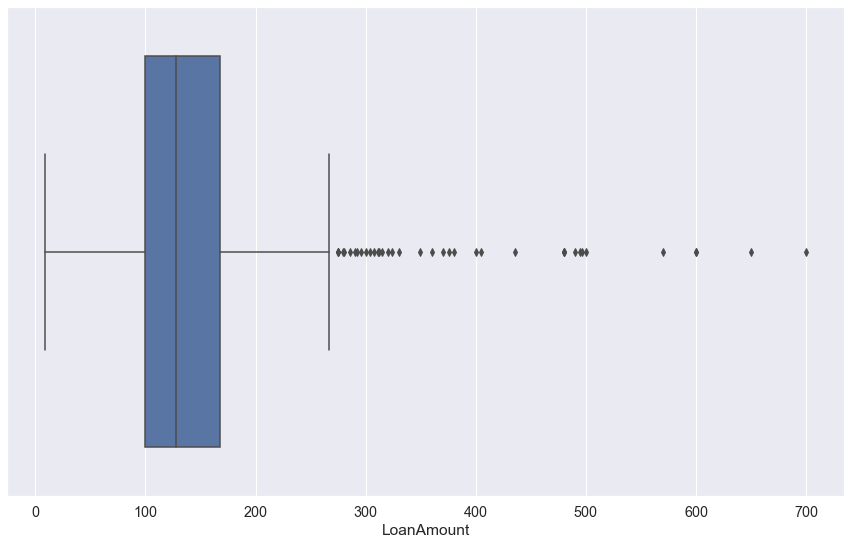

In [203]:
sns.boxplot(data = df , x ="LoanAmount")

## Removing Outliers


In [204]:
numerical = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
Q1 = df[numerical].quantile(0.25)
Q3 = df[numerical].quantile(0.75)
IQR = Q3 - Q1
IQR

ApplicantIncome      2917.00
CoapplicantIncome    2253.75
LoanAmount             67.25
dtype: float64

In [205]:
df[numerical] = df[~((df[numerical] > Q3+1.5*IQR) | (df[numerical] < Q1 - 1.5*IQR))][numerical]
df = df.dropna().reset_index().drop('index', axis=1)

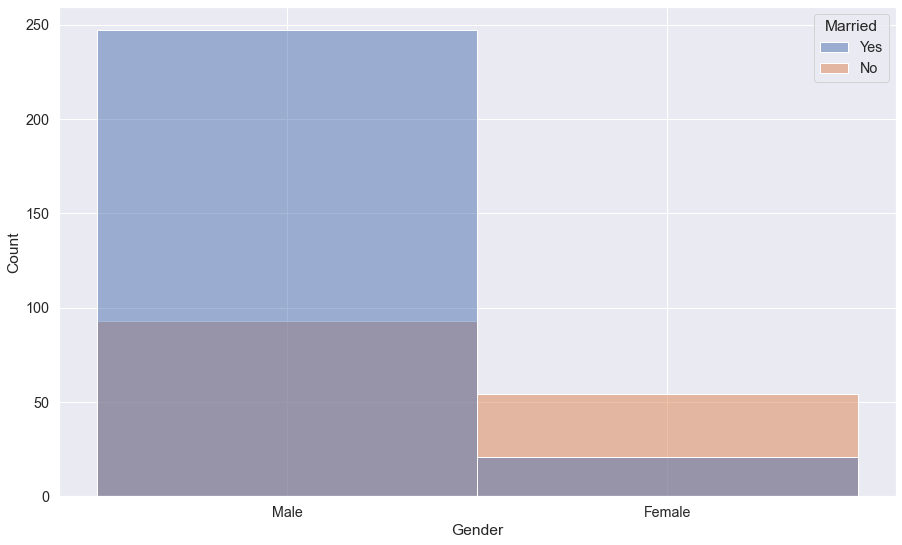

In [206]:
sns.histplot( x="Gender", hue="Married", data=df, stat="count");

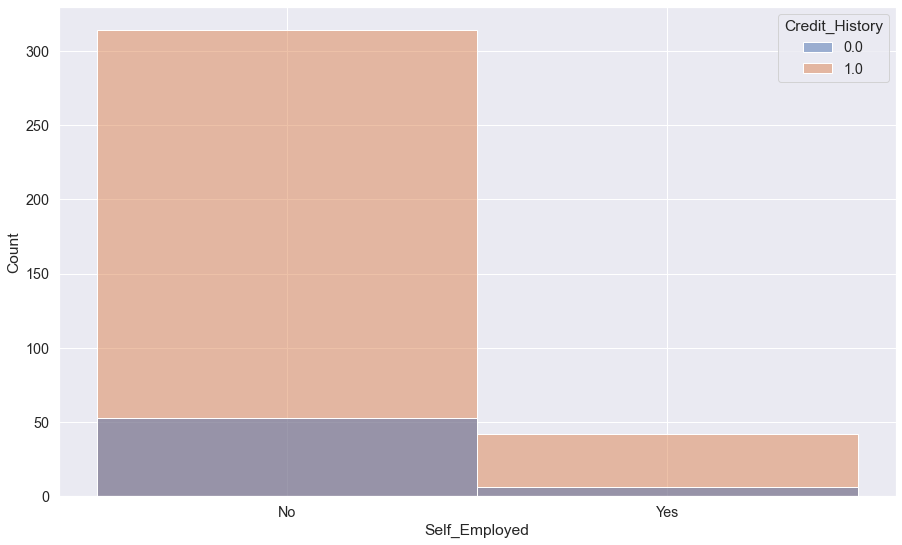

In [207]:
sns.histplot( x="Self_Employed", hue="Credit_History", data=df, stat="count");

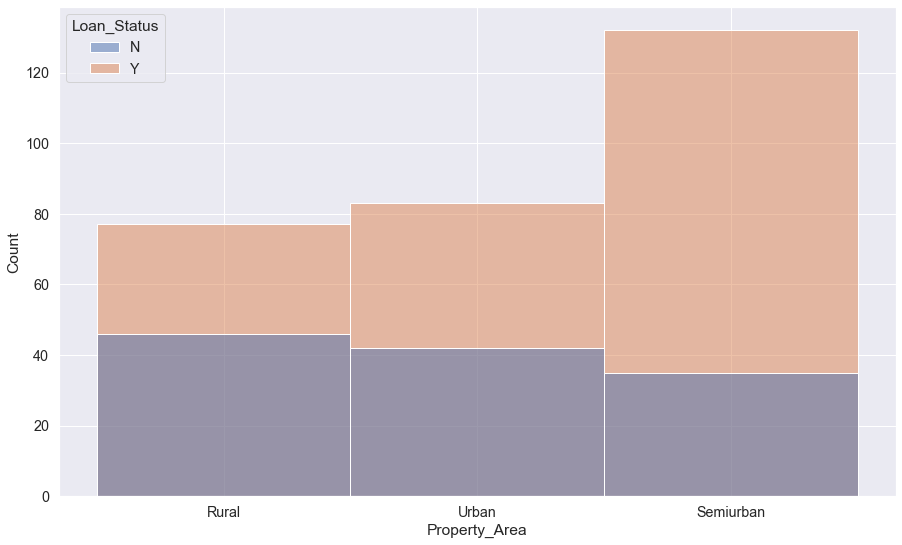

In [208]:
sns.histplot( x="Property_Area", hue="Loan_Status", data=df, stat="count");

# Data Preprocessing

In [209]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [210]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['LoanAmount']  = df['LoanAmount']*1000

In [211]:
df=df.replace('No',0).replace('Yes',1).replace('Y',1).replace('N',0)

In [212]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,1,1,Graduate,0,4583.0,1508.0,128000.0,360.0,1.0,Rural,0
1,Male,1,0,Graduate,1,3000.0,0.0,66000.0,360.0,1.0,Urban,1
2,Male,1,0,Not Graduate,0,2583.0,2358.0,120000.0,360.0,1.0,Urban,1
3,Male,0,0,Graduate,0,6000.0,0.0,141000.0,360.0,1.0,Urban,1
4,Male,1,2,Graduate,1,5417.0,4196.0,267000.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
410,Female,0,0,Graduate,0,2900.0,0.0,71000.0,360.0,1.0,Rural,1
411,Male,1,3+,Graduate,0,4106.0,0.0,40000.0,180.0,1.0,Rural,1
412,Male,1,1,Graduate,0,8072.0,240.0,253000.0,360.0,1.0,Urban,1
413,Male,1,2,Graduate,0,7583.0,0.0,187000.0,360.0,1.0,Urban,1


In [213]:
Cat_features = df.select_dtypes(include = "object_")
Num_features = df.select_dtypes(include = "number")

In [214]:
for feature in Cat_features.columns:
    print("Feature {} has {} of unique values".format(feature , df[feature].nunique()))

Feature Gender has 2 of unique values
Feature Dependents has 4 of unique values
Feature Education has 2 of unique values
Feature Property_Area has 3 of unique values


In [215]:
Encoder = ColumnTransformer(transformers=[("OHE" , OneHotEncoder(sparse=False , drop="first") , ["Gender" , "Dependents",'Education','Property_Area']  )  ] ,remainder="passthrough" )

In [216]:
steps = list()
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , RobustScaler()))
steps.append(("Model" , RandomForestClassifier()))
pipeline = Pipeline(steps = steps)

In [217]:
x = df.drop("Loan_Status" , axis = 1 )
y = df["Loan_Status"]

In [218]:
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)
df['LoanAmount'] = df['LoanAmount'].astype(int)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)
df['Credit_History'] = df['Credit_History'].astype(int)

In [219]:
scores = cross_validate(pipeline , x , y , cv = 5 , scoring="accuracy" , return_train_score=True)

In [220]:
scores["train_score"].mean()

1.0

In [221]:
scores["test_score"].mean()

0.8072289156626505

In [222]:
models = list()
models.append(("LR" , LogisticRegression()))
models.append(("KNN" , KNeighborsClassifier()))
models.append(("CART" , DecisionTreeClassifier()))
models.append(("RF" , RandomForestClassifier()))
models.append(("xg" , XGBClassifier()))

In [223]:
for model in models:
    steps = list()
    steps.append(("Encoder" , Encoder))
    steps.append(("Scaler" , RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps = steps)
    scores = cross_validate(pipeline , x , y , scoring="accuracy"  ,cv = 5 , return_train_score=True)
    print(model[0])
    print("Train_accuracy" , scores["train_score"].mean() )
    print("-" * 10)
    print("Test_accuracy" , scores["test_score"].mean())
    print("-" * 20)
    print("\n")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR
Train_accuracy 0.8216867469879517
----------
Test_accuracy 0.819277108433735
--------------------


KNN
Train_accuracy 0.8120481927710843
----------
Test_accuracy 0.746987951807229
--------------------


CART
Train_accuracy 1.0
----------
Test_accuracy 0.7325301204819278
--------------------


RF
Train_accuracy 1.0
----------
Test_accuracy 0.8024096385542169
--------------------


xg
Train_accuracy 1.0
----------
Test_accuracy 0.8072289156626505
--------------------




In [224]:
steps = list()
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , RobustScaler()))
steps.append(("Model" , RandomForestClassifier()))
pipeline = Pipeline(steps = steps)

In [226]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'Model__bootstrap': [True],
    'Model__max_depth': [4,6,8,10,],
    'Model__max_features': [ 4,5, 6,7],
    'Model__min_samples_leaf': [3, 4, 5,6,7,8],
    'Model__min_samples_split': [2,3],
    'Model__n_estimators': [14,15,16,17,18]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,return_train_score=True, verbose = 2)
grid_search.fit(x, y)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'Dependents',
                                                                          'Education',
                                                                          'Property_Area'])])),
                                       ('Scaler', RobustScaler()),
                                       ('Model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'Model__bootstr

In [227]:
grid_search.best_params_

{'Model__bootstrap': True,
 'Model__max_depth': 8,
 'Model__max_features': 4,
 'Model__min_samples_leaf': 7,
 'Model__min_samples_split': 2,
 'Model__n_estimators': 18}

In [228]:
grid_search.cv_results_["mean_test_score"].mean()

0.8156355169487599

In [229]:
grid_search.cv_results_["mean_train_score"].mean()

0.8378971446136138

In [230]:
final_model = grid_search.best_estimator_

In [231]:
inputs = x.columns

In [232]:
import joblib

In [233]:
joblib.dump(final_model , "Model.pkl")
joblib.dump( inputs , "Inputs.pkl" )

['Inputs.pkl']

In [234]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [235]:
x["Property_Area"].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [236]:
x["Loan_Amount_Term"].min()

36.0

In [ ]:
import streamlit as st
import joblib 
import pandas as pd

Inputs = joblib.load("Inputs.pkl")
Model = joblib.load("Model.pkl")

def predict(Gender, Married, Dependents, Education, Self_Employed,
            ApplicantIncome, CoapplicantIncome, LoanAmount,
            Loan_Amount_Term, Credit_History, Property_Area):
    test_df = pd.DataFrame(columns = Inputs)
    test_df.at[0,"Gender"] = Gender
    test_df.at[0,"Married"] = Married
    test_df.at[0,"Dependents"] = Dependents
    test_df.at[0,"Education"] = Education
    test_df.at[0,"Self_Employed"] = Self_Employed
    test_df.at[0,"ApplicantIncome"] = ApplicantIncome
    test_df.at[0,"CoapplicantIncome"] = CoapplicantIncome
    test_df.at[0,"LoanAmount"] = LoanAmount
    test_df.at[0,"Loan_Amount_Term"] = Credit_History
    test_df.at[0,"Credit_History"] = Credit_History
    test_df.at[0,"Property_Area"] = Property_Area
    result = Model.predict(test_df)[0]
    
def main():
    st.title("Loan Qualifying Procedure App")
    Gender = st.selectbox("Gender" , ['Male', 'Female'])
    Married = st.selectbox("Married" , ['Yes', 'No'])
    Dependents = st.selectbox("Dependents" , ['0', '1', '2', '3+'])
    Education = st.selectbox("Education" , ['Graduate', 'Not Graduate'])
    Self_Employed = st.selectbox("Self Employed or not" , ['Yes', 'No'])
    ApplicantIncome = st.slider("Applicant Income" , min_value=150, max_value=50000, value=0, step=1)
    CoapplicantIncome = st.slider("Coapplicant  Income" , min_value=0, max_value=20000, value=0, step=1)
    LoanAmount = st.slider("Loan  Amount" , min_value=5000, max_value=1000000, value=0, step=1)
    Loan_Amount_Term = st.selectbox("Loan Amount Term per day" , [360, 120, 240, 180,  60, 300, 480,  36,  84,  12])
    Credit_History = st.selectbox("Credit History" , [1, 0])
    Property_Area = st.selectbox("Property Area" , ['Urban', 'Rural', 'Semiurban'])
    
    if st.button("Predict"):
        result = predict(Gender, Married, Dependents, Education, Self_Employed,
            ApplicantIncome, CoapplicantIncome, LoanAmount,
            Loan_Amount_Term, Credit_History, Property_Area)
        label = ["Fail","Success"]
        st.text("The output is {}".format(label[result]))
if __name__ == '__main__':
    main()